<a href="https://colab.research.google.com/github/pranaydurnala/Data-analyst-projects/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/content/crime_data.csv")
df

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
0,2022-04-12,2020-10-01,00:01,19,Mission,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,13400 RANGOON ST
1,2023-01-05,2020-02-01,08:00,2,Rampart,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,900 N MARIPOSA AV
2,2023-03-21,2020-03-15,12:00,19,Mission,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,8500 COLUMBUS AV
3,2023-06-04,2020-07-01,12:00,20,Olympic,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1700 S WESTMORELAND AV
4,2022-02-02,2020-02-09,12:00,11,Northeast,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,30,F,W,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Other,2800 WAVERLY DR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146933,2022-08-27,2022-08-27,21:00,6,Hollywood,1,210,ROBBERY,0,X,X,OTHER BUSINESS,MACE/PEPPER SPRAY,Invest Cont,5400 HOLLYWOOD BL
146934,2022-12-16,2022-12-15,23:15,15,N Hollywood,1,210,ROBBERY,39,M,B,SIDEWALK,HAND GUN,Invest Cont,7300 COLDWATER CANYON AV
146935,2022-04-24,2022-04-23,17:00,11,Northeast,2,940,EXTORTION,19,F,H,SINGLE FAMILY DWELLING,VERBAL THREAT,Invest Cont,3300 ANDRITA ST
146936,2022-08-08,2022-08-08,11:28,10,West Valley,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,36,F,W,SINGLE FAMILY DWELLING,VERBAL THREAT,Adult Arrest,7300 LOUISE AV


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146938 entries, 0 to 146937
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date Rptd     146938 non-null  object
 1   DATE OCC      146938 non-null  object
 2   TIME OCC      146938 non-null  object
 3   AREA          146938 non-null  int64 
 4   AREA NAME     146938 non-null  object
 5   Part 1-2      146938 non-null  int64 
 6   Crm Cd        146938 non-null  int64 
 7   Crm Cd Desc   146938 non-null  object
 8   Vict Age      146938 non-null  int64 
 9   Vict Sex      146937 non-null  object
 10  Vict Descent  146937 non-null  object
 11  Premis Desc   146937 non-null  object
 12  Weapon Desc   146937 non-null  object
 13  Status Desc   146937 non-null  object
 14  LOCATION      146937 non-null  object
dtypes: int64(4), object(11)
memory usage: 16.8+ MB


In [ ]:
df.describe()

,AREA,Part 1-2,Crm Cd,Vict Age
count,146938.000000,146938.000000,146938.000000,146938.000000
mean,10.436130,1.544801,508.066191,34.339327
std,6.229021,0.497991,241.826937,17.910438
min,1.000000,1.000000,110.000000,-2.000000
25%,5.000000,1.000000,230.000000,23.000000
50%,11.000000,2.000000,624.000000,33.000000
75%,16.000000,2.000000,626.000000,46.000000
max,21.000000,2.000000,956.000000,99.000000


In [ ]:
df.isna().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,1


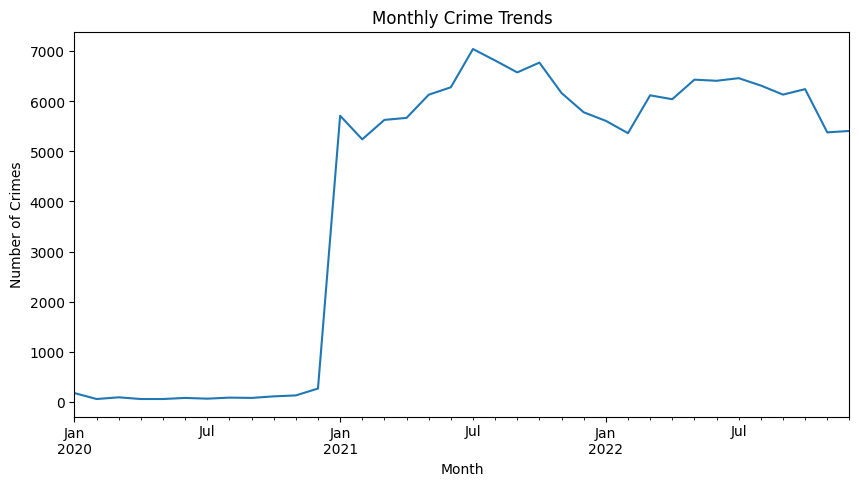

In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')



#Monthly Crime Trends
df['Month'] = df['DATE OCC'].dt.to_period('M')
monthly_crimes = df.groupby('Month').size()
monthly_crimes.plot(kind='line', figsize=(10, 5), title="Monthly Crime Trends")
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
plt.show()

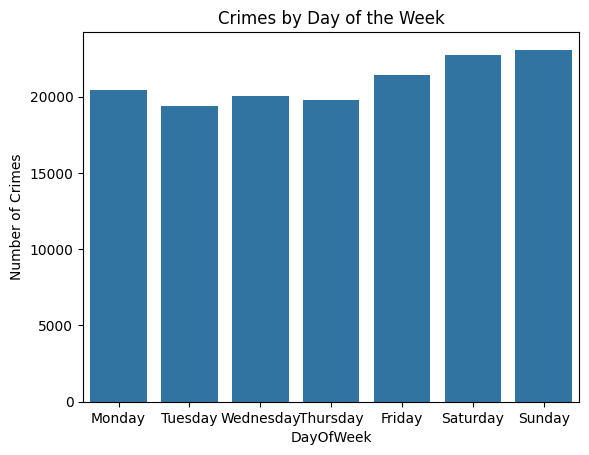

In [ ]:
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
sns.countplot(x='DayOfWeek', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Crimes by Day of the Week")
plt.ylabel("Number of Crimes")
plt.show()

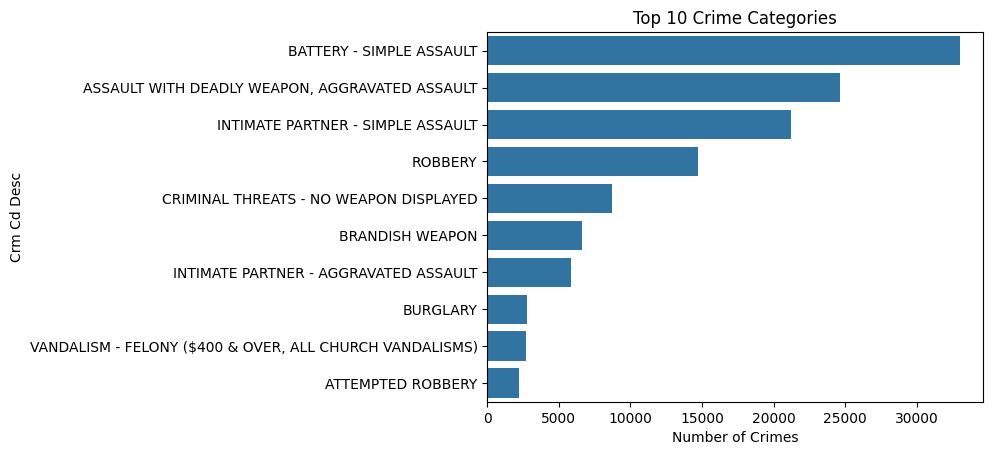

In [ ]:
# Crime Category Breakdown
sns.countplot(y='Crm Cd Desc', data=df, order=df['Crm Cd Desc'].value_counts().index[:10])
plt.title("Top 10 Crime Categories")
plt.xlabel("Number of Crimes")
plt.show()

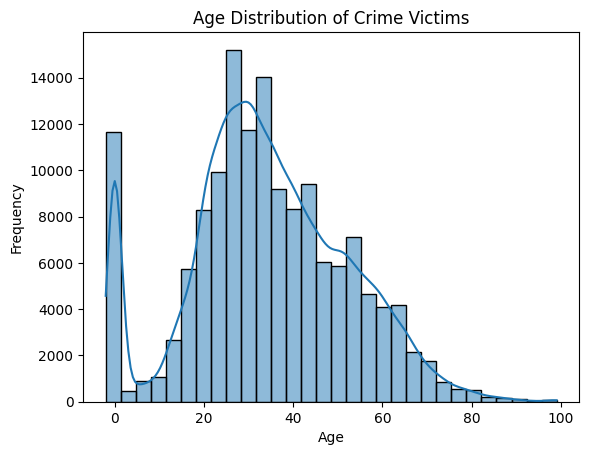

In [ ]:

# Age Distribution of Victims
sns.histplot(df['Vict Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Crime Victims")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<ipython-input-19-18152a453d0e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vict Sex', data=df, palette="viridis")


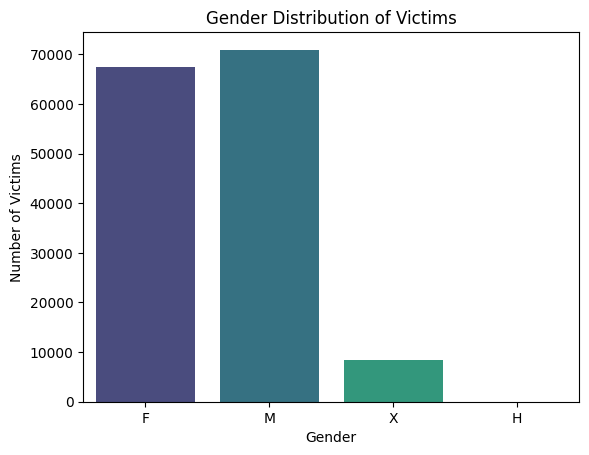

In [ ]:
# Gender Distribution of Victims
sns.countplot(x='Vict Sex', data=df, palette="viridis")
plt.title("Gender Distribution of Victims")
plt.xlabel("Gender")
plt.ylabel("Number of Victims")
plt.show()

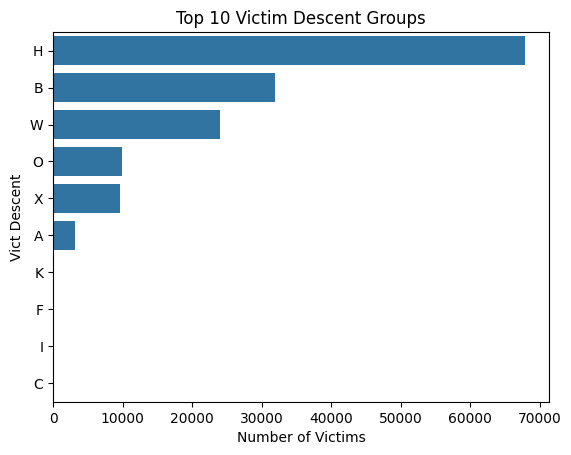

In [ ]:
# Victim Descent Breakdown
sns.countplot(y='Vict Descent', data=df, order=df['Vict Descent'].value_counts().index[:10])
plt.title("Top 10 Victim Descent Groups")
plt.xlabel("Number of Victims")
plt.show()

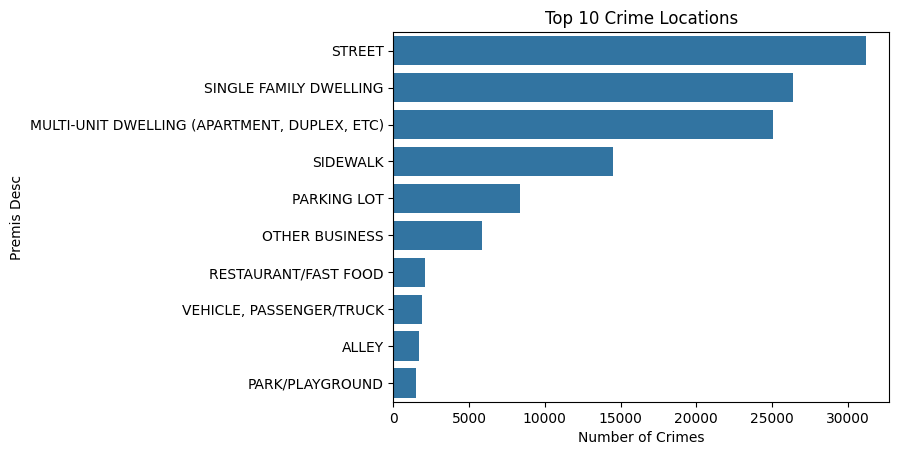

In [ ]:
# Premises Analysis - Common Crime Locations
sns.countplot(y='Premis Desc', data=df, order=df['Premis Desc'].value_counts().index[:10])
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.show()

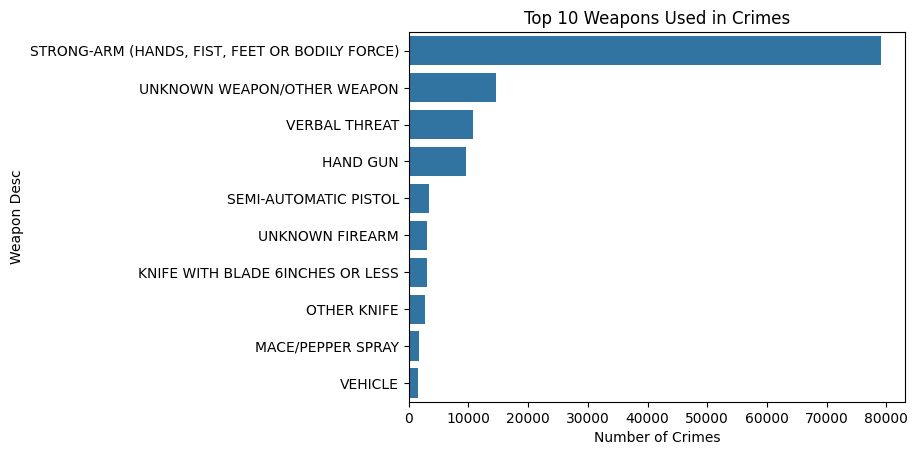

In [ ]:
# Weapon Type Usage
sns.countplot(y='Weapon Desc', data=df, order=df['Weapon Desc'].value_counts().index[:10])
plt.title("Top 10 Weapons Used in Crimes")
plt.xlabel("Number of Crimes")
plt.show()